## Problem to solve

Predict if health insurance customers would be interested in purchasing the company's Vehicle Insurance. Current data includes customers gender, age, region code type, vehicle age, vehicle damage, health insurance premium, and policy sales channel.

In [1]:
## Install libraries

library(tidyverse)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
## Read data

train <- read_csv("../input/health-insurance-cross-sell-prediction/train.csv")

Rows: 381109 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Gender, Vehicle_Age, Vehicle_Damage
dbl (9): id, Age, Driving_License, Region_Code, Previously_Insured, Annual_P...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
## Clean original data, and rename it

train$Response[train$Response==0] <- "No"
train$Response[train$Response==1] <- "Yes"
train$Driving_License[train$Driving_License==0] <- "No"
train$Driving_License[train$Driving_License==1] <- "Yes"
train$Previously_Insured[train$Previously_Insured==0] <- "No"
train$Previously_Insured[train$Previously_Insured==1] <- "Yes"
head(train)

customer_survey <- train


id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Male,44,Yes,28,No,> 2 Years,Yes,40454,26,217,Yes
2,Male,76,Yes,3,No,1-2 Year,No,33536,26,183,No
3,Male,47,Yes,28,No,> 2 Years,Yes,38294,26,27,Yes
4,Male,21,Yes,11,Yes,< 1 Year,No,28619,152,203,No
5,Female,29,Yes,41,Yes,< 1 Year,No,27496,152,39,No
6,Female,24,Yes,33,No,< 1 Year,Yes,2630,160,176,No


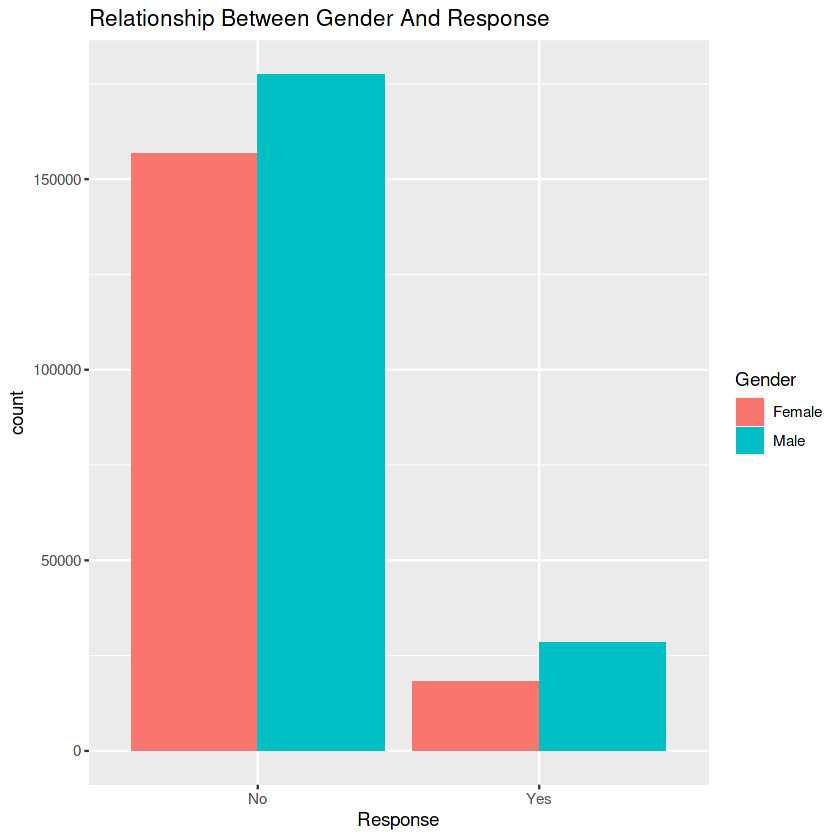

In [4]:
## 1. Consider gender as a factor

#### 1.1 Visualization of gender factor
customer_survey %>% 
  ggplot(mapping = aes(fill=Gender, x=Response)) + 
  geom_bar(position="dodge") + 
  ggtitle("Relationship Between Gender And Response")

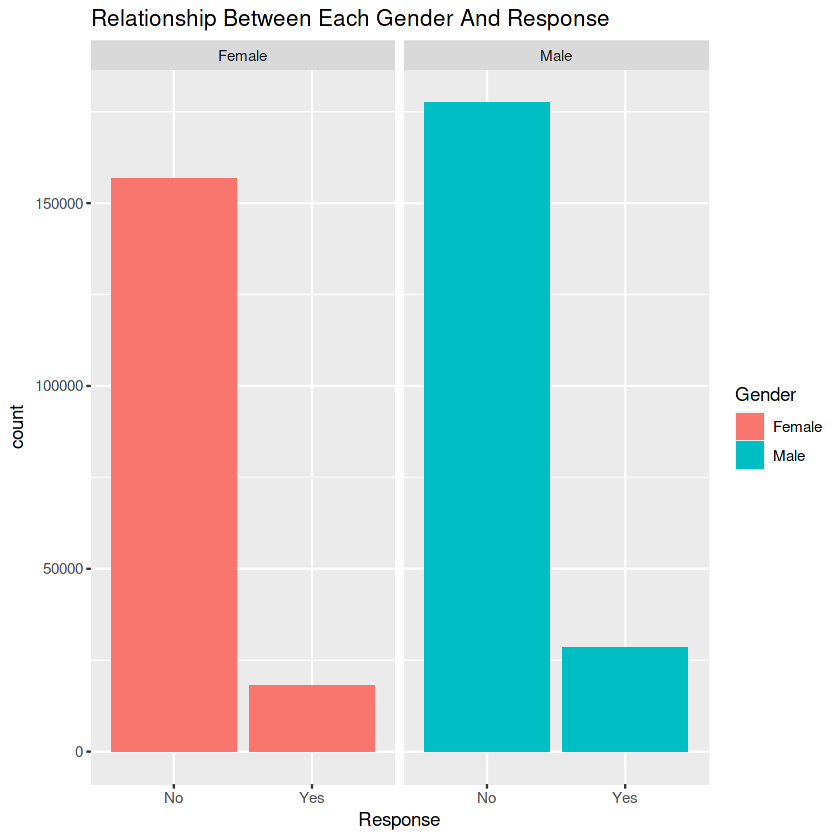

In [5]:
#### 1.2 Create a new visualization to look at each gender

customer_survey %>% 
  ggplot(mapping = aes(fill=Gender, x=Response)) + 
  geom_bar(position="dodge") + 
  facet_wrap(~Gender)+
  ggtitle("Relationship Between Each Gender And Response")

**Each gender group responds about the same way.

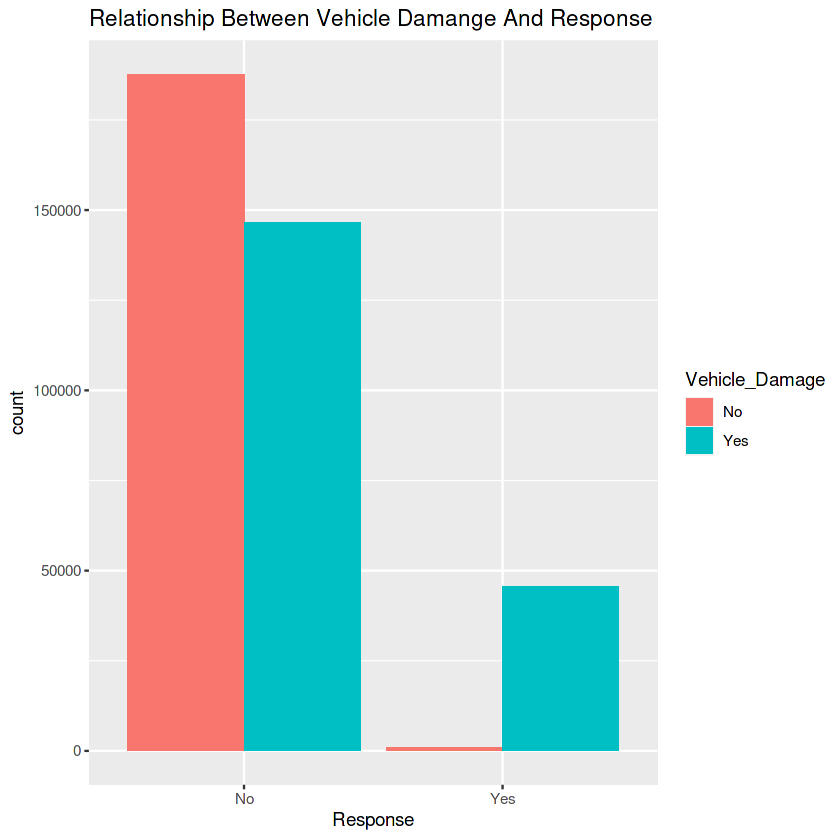

In [6]:
## 2. Consider vehicle damage as a factor

#### 2.1 Visualization of vehicle damage factor
customer_survey %>% 
  ggplot(mapping = aes(fill=Vehicle_Damage, x=Response)) + 
  geom_bar(position="dodge") + 
  ggtitle("Relationship Between Vehicle Damange And Response")

**People who have vehicle damage are more likely to have interest in purchasing vehicle insurance than those who don't have vehicle damage; the majority of those who don't have vehicle damage have no interest.

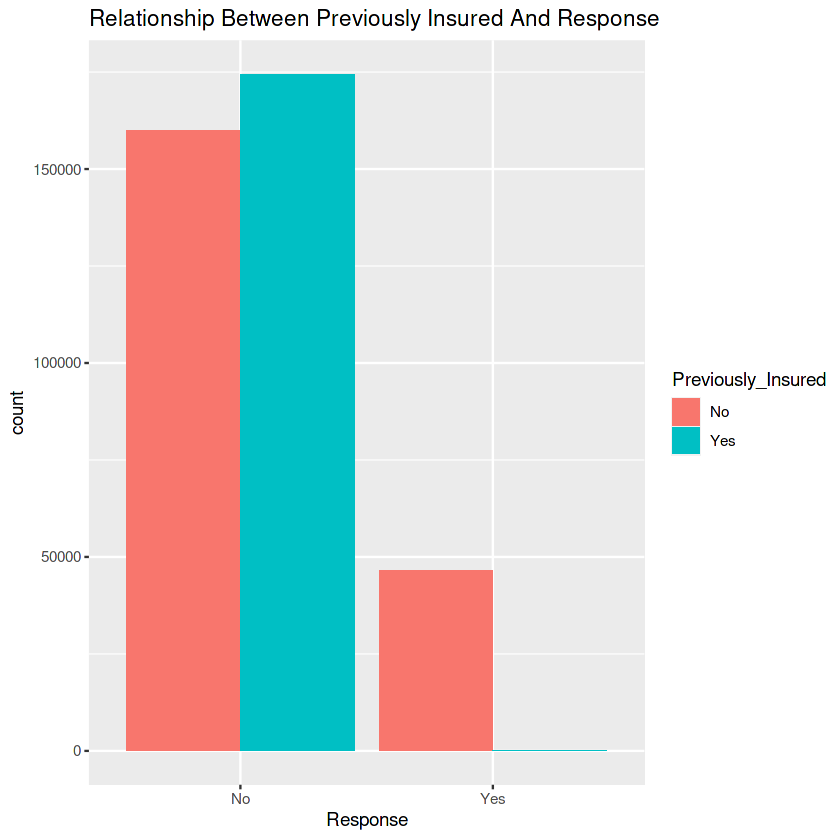

In [7]:
## 3. Consider if previously insured as a factor

#### 3.1 Visualization
customer_survey %>% 
  ggplot(mapping = aes(fill=Previously_Insured, x=Response)) + 
  geom_bar(position="dodge") + 
  ggtitle("Relationship Between Previously Insured And Response")

**People who are previously insured are mostly likely to have no interest in buying this new vehicle insurance.

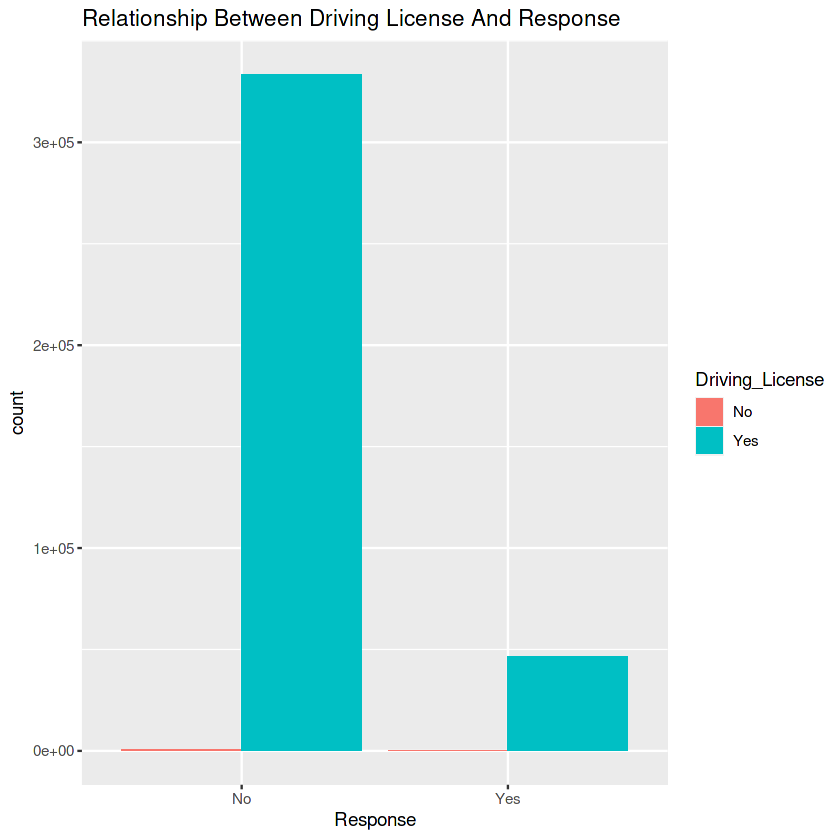

In [8]:
## 4. Consider driving license as the factor

#### 4.1 Visualization

customer_survey %>% 
  ggplot(mapping = aes(fill=Driving_License, x=Response)) + 
  geom_bar(position="dodge") + 
  ggtitle("Relationship Between Driving License And Response")

**Obviously, people who don't have a driver license are most likely not interested.

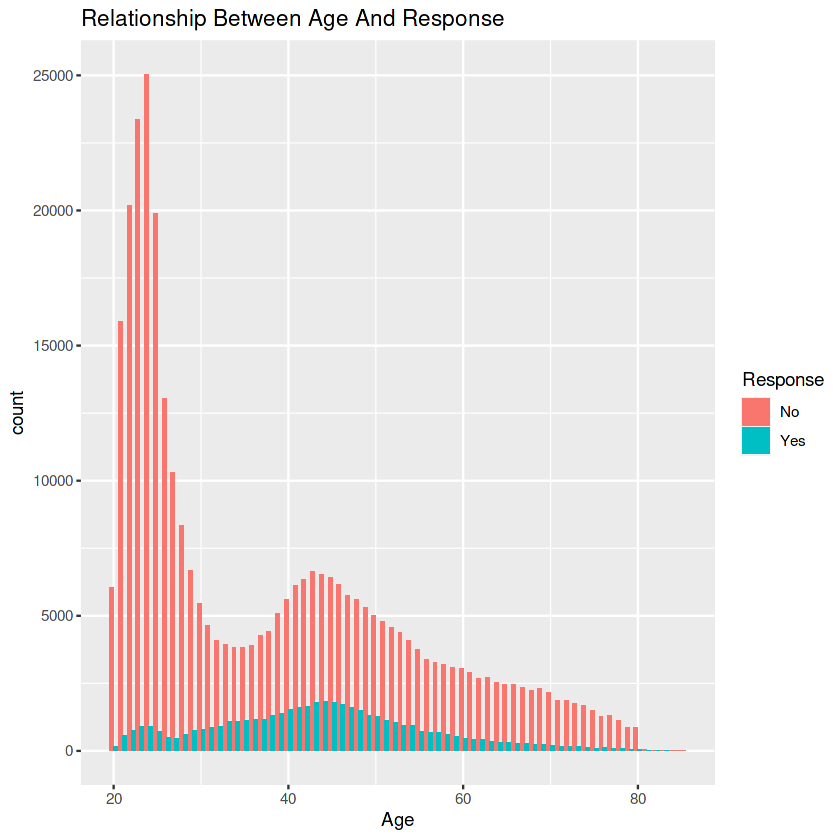

In [9]:
## 5. Consider age as a factor

#### 5.1 Visualization

customer_survey %>% 
  ggplot(mapping = aes(fill=Response, x=Age)) + 
  geom_bar(position="dodge") + 
  ggtitle("Relationship Between Age And Response")

**It looks like people around 45 years old have the highest likelihood to be interested, but it needs to be further verified by analyzing each age.

In [10]:
#### 5.2 Create a new table to analyze age factor based on interest percentage of each age group

age_table <- customer_survey %>%
  group_by(Age) %>%
  summarize(interested = length(which(Response=="Yes")),not_interested = length(which(Response=="No")),total=interested+not_interested,int_percent=interested/total*100,not_int_percent=not_interested/total*100)

head(age_table)


Age,interested,not_interested,total,int_percent,not_int_percent
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
20,171,6061,6232,2.743902,97.25610
21,574,15883,16457,3.487877,96.51212
22,763,20201,20964,3.639573,96.36043
23,892,23364,24256,3.677441,96.32256
24,913,25047,25960,3.516949,96.48305
25,734,19902,20636,3.556891,96.44311


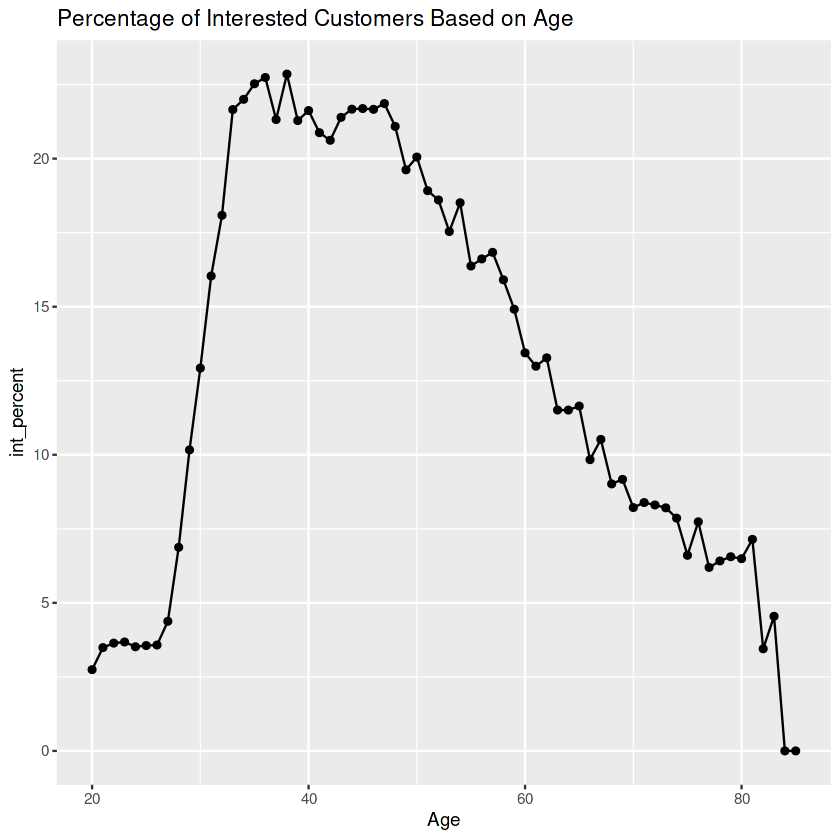

In [11]:
#### 5.3 Visualization of the new table for age factor

age_table %>% 
  ggplot(mapping = aes(x=Age,y=int_percent))+
  geom_point()+
  geom_line() + 
  ggtitle("Percentage of Interested Customers Based on Age")

**It looks like age group of 33-38 has the highest interest, with age group of 33-50 having over 20% interest on average.

In [12]:
## 6. Consider annual premium as the factor

#### 6.1 Create a new table to analyze annual premium

annual_pre_table <- customer_survey %>%
  group_by(Annual_Premium) %>%
  summarize(interested = length(which(Response=="Yes")),not_interested = length(which(Response=="No")),total=interested+not_interested,int_percent=interested/total*100,not_int_percent=not_interested/total*100)
head(annual_pre_table)


Annual_Premium,interested,not_interested,total,int_percent,not_int_percent
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
2630,8505,56372,64877,13.10942,86.89058
6098,0,1,1,0.00000,100.00000
7670,0,1,1,0.00000,100.00000
8739,0,1,1,0.00000,100.00000
9792,0,1,1,0.00000,100.00000
9816,1,0,1,100.00000,0.00000


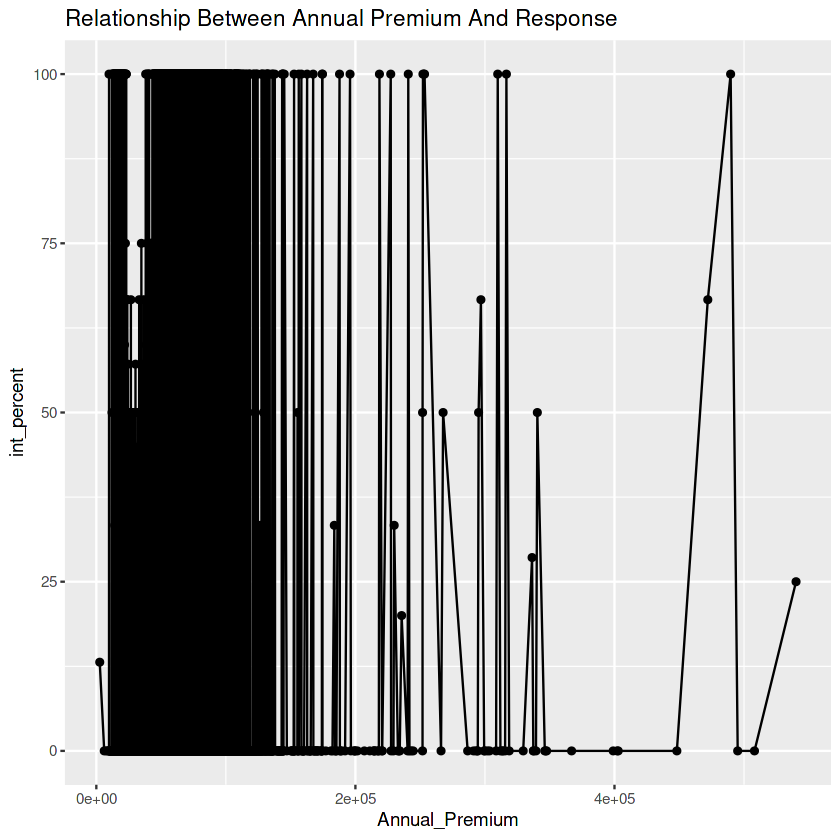

In [13]:
#### 6.2 Visualization

annual_pre_table %>% 
  ggplot(mapping = aes(x=Annual_Premium,y= int_percent))+
  geom_point()+
  geom_line()+
  ggtitle("Relationship Between Annual Premium And Response")

**The plot above doesn't make much sense, and the data needs to be cleaned. 

In [14]:
#### 6.3 Remove rows with total of fewer than 10 by representing the main range of annual premium


premium_new <- annual_pre_table[annual_pre_table$total >=10,]
head(premium_new)


Annual_Premium,interested,not_interested,total,int_percent,not_int_percent
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
2630,8505,56372,64877,13.10942,86.89058
20368,2,8,10,20.00000,80.00000
20846,0,12,12,0.00000,100.00000
20898,0,10,10,0.00000,100.00000
20938,3,7,10,30.00000,70.00000
20946,0,10,10,0.00000,100.00000


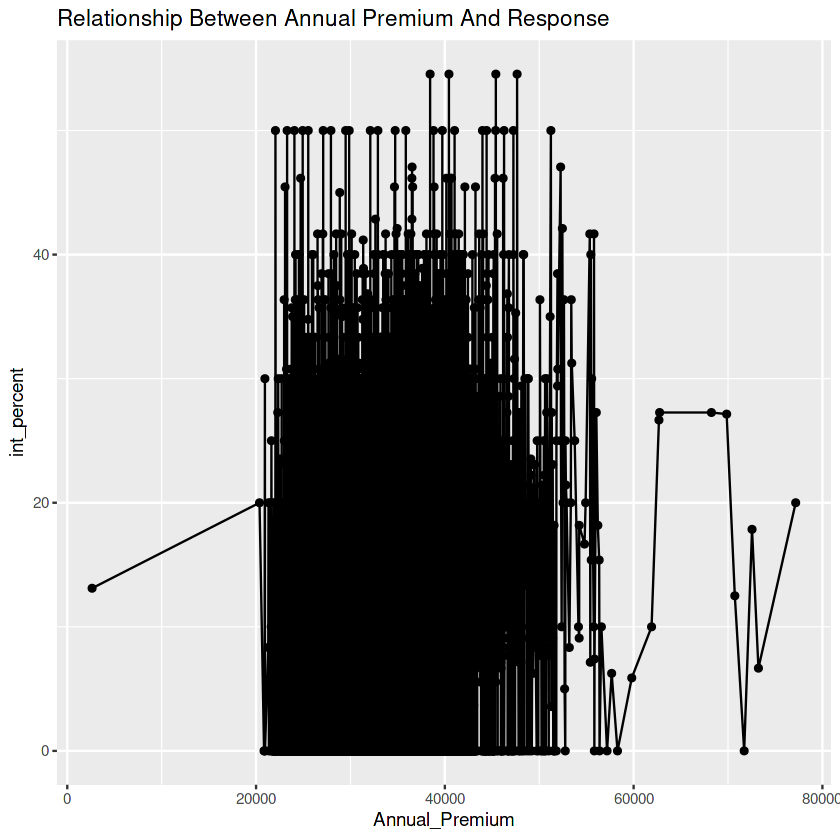

In [15]:
#### 6.4 Visualiation of the cleaned data

premium_new %>% 
  ggplot(mapping = aes(x=Annual_Premium,y= int_percent))+
  geom_point()+
  geom_line()+
  ggtitle("Relationship Between Annual Premium And Response")

In [16]:
#####It looks like main annual premium ranges between 20000 and 60000, so let's narrow it down.


premium_new_2 <- premium_new %>% 
  filter(Annual_Premium >= 20000 & Annual_Premium <= 60000)
head(premium_new_2)


Annual_Premium,interested,not_interested,total,int_percent,not_int_percent
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
20368,2,8,10,20.000000,80.00000
20846,0,12,12,0.000000,100.00000
20898,0,10,10,0.000000,100.00000
20938,3,7,10,30.000000,70.00000
20946,0,10,10,0.000000,100.00000
21292,1,11,12,8.333333,91.66667


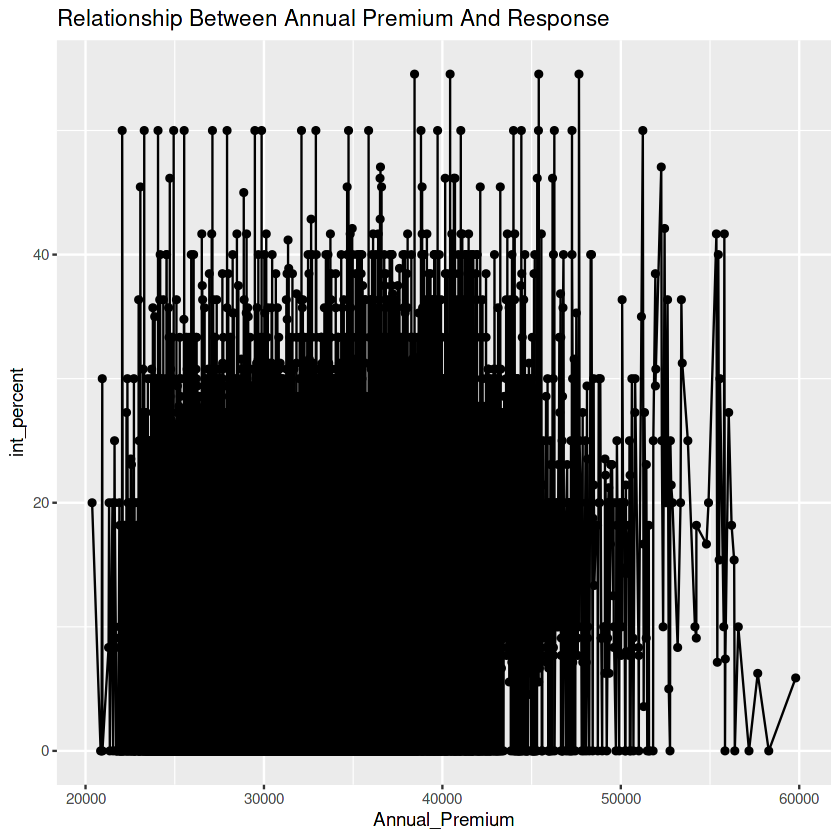

In [17]:
#### 6.6 Visualization of the narrowed down data

premium_new_2 %>% 
  ggplot(mapping = aes(x=Annual_Premium,y= int_percent))+
  geom_point()+geom_line()+
  ggtitle("Relationship Between Annual Premium And Response")

**After analysis in different ways, there is no certain correlation between annual premium and customer interest.

In [18]:
## 7. Consider region code as a factor

#### 7.1 Creating a new table for analysis

rc_table <- customer_survey %>%
  group_by(Region_Code) %>%
  summarize(interested = length(which(Response=="Yes")),not_interested = length(which(Response=="No")),total=interested+not_interested,int_percent=interested/total*100,not_int_percent=not_interested/total*100)

head(rc_table)


Region_Code,interested,not_interested,total,int_percent,not_int_percent
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
0,174,1847,2021,8.609599,91.39040
1,109,899,1008,10.813492,89.18651
2,287,3751,4038,7.107479,92.89252
3,1181,8070,9251,12.766187,87.23381
4,285,1516,1801,15.824542,84.17546
5,148,1131,1279,11.571540,88.42846


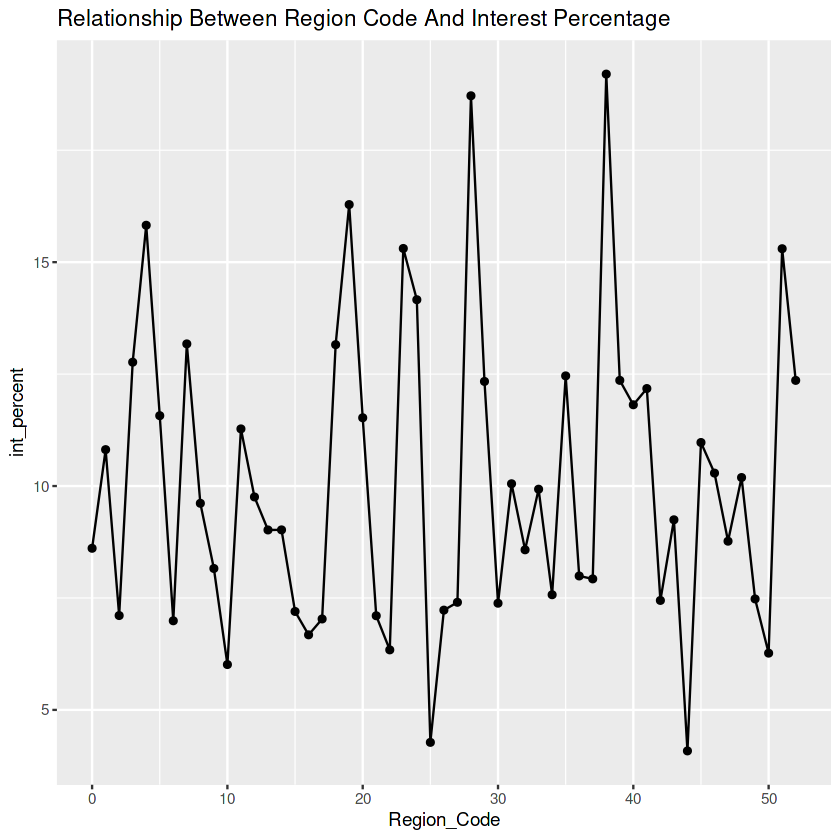

In [19]:
#### 7.2 Visualization of region code factor

rc_table %>% 
  ggplot(mapping = aes(x=Region_Code,y= int_percent))+
  geom_point()+geom_line()+
  ggtitle("Relationship Between Region Code And Interest Percentage")

**The top regions that have the highest interest percentage above 15%: 38, 28, 19, 4, 23, 51.

In [20]:
##8. Consider vehicle age as a factor

#### 8.1 Create a new table to analyze vehicle age


va_table <- customer_survey %>%
  group_by(Vehicle_Age) %>%
  summarize(interested = length(which(Response=="Yes")),not_interested = length(which(Response=="No")),total=interested+not_interested,int_percent=interested/total*100,not_int_percent=not_interested/total*100)

head(va_table)


Vehicle_Age,interested,not_interested,total,int_percent,not_int_percent
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
< 1 Year,7202,157584,164786,4.370517,95.62948
> 2 Years,4702,11305,16007,29.374649,70.62535
1-2 Year,34806,165510,200316,17.375547,82.62445


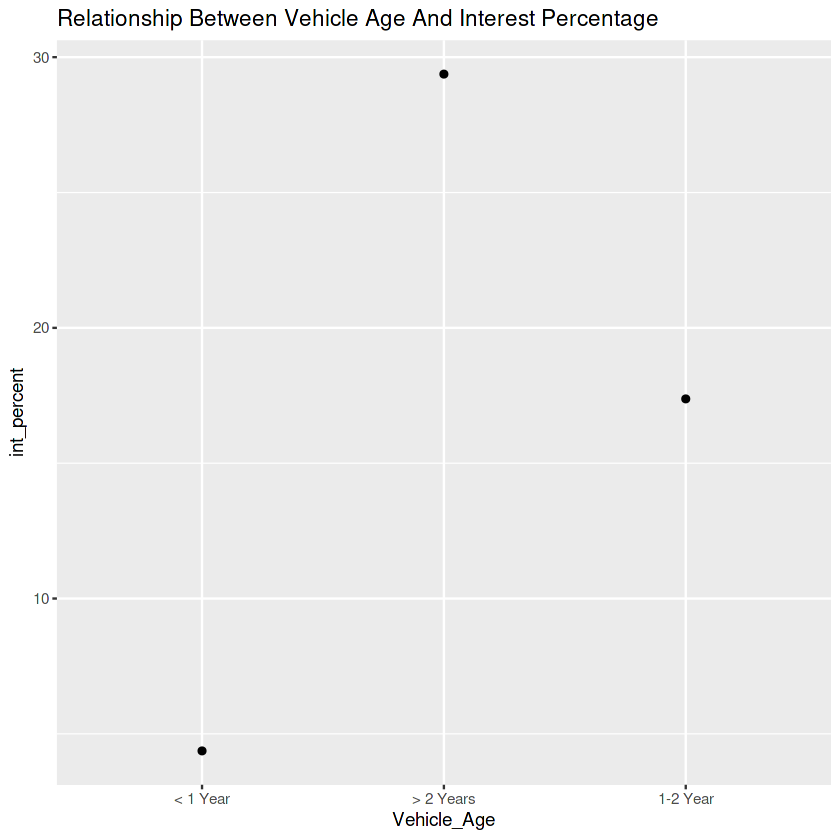

In [21]:
#### 8.2 Visualization of vehicle age factor

va_table %>% 
  ggplot(mapping = aes(x=Vehicle_Age,y= int_percent))+
  geom_point()+
  ggtitle("Relationship Between Vehicle Age And Interest Percentage")

**Customers who have at least 2 years of vehicle age have the highest interest percentage

In [22]:
## 9. Consider policy sales channel as a factor

#### 9.1 Create a new table for analyzing policy sales channel

psc_table <- customer_survey %>%
  group_by(Policy_Sales_Channel) %>%
  summarize(interested = length(which(Response=="Yes")),not_interested = length(which(Response=="No")),total=interested+not_interested,int_percent=interested/total*100,not_int_percent=not_interested/total*100)
head(psc_table)


Policy_Sales_Channel,interested,not_interested,total,int_percent,not_int_percent
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,35,1039,1074,3.258845,96.74115
2,1,3,4,25.000000,75.00000
3,159,364,523,30.401530,69.59847
4,102,407,509,20.039293,79.96071
6,0,3,3,0.000000,100.00000
7,182,1416,1598,11.389237,88.61076


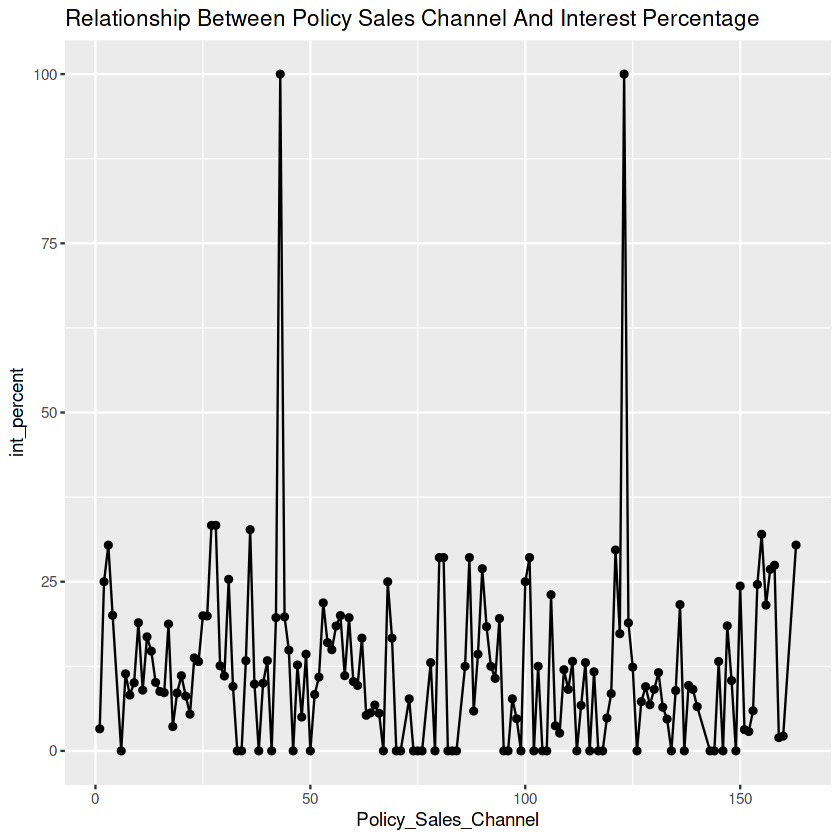

In [23]:
#### 9.2 Visualization of Policy Sales Channel factor
psc_table %>% 
  ggplot(mapping = aes(x=Policy_Sales_Channel,y= int_percent))+
  geom_point()+geom_line()+
  ggtitle("Relationship Between Policy Sales Channel And Interest Percentage")



In [24]:
###Sort table

sort_psc_table <- psc_table %>%
  arrange(desc(int_percent))
head(sort_psc_table)

Policy_Sales_Channel,interested,not_interested,total,int_percent,not_int_percent
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
43,1,0,1,100.00000,0.00000
123,1,0,1,100.00000,0.00000
27,1,2,3,33.33333,66.66667
28,1,2,3,33.33333,66.66667
36,17,35,52,32.69231,67.30769
155,395,839,1234,32.00972,67.99028


**Upon further analysis, excluding small samples, after sorting the data by int_percentage in a descending order, the top channels are: 36, 155, 163, 3, 121.

In [25]:
## 10. Consider vintage as a factor

#### 10.1 Create a new table for analyzing vintage

vin_table <- customer_survey %>%
  group_by(Vintage) %>%
  summarize(interested = length(which(Response=="Yes")),not_interested = length(which(Response=="No")),total=interested+not_interested,int_percent=interested/total*100,not_int_percent=not_interested/total*100)
head(vin_table)

Vintage,interested,not_interested,total,int_percent,not_int_percent
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
10,147,1164,1311,11.21281,88.78719
11,191,1153,1344,14.21131,85.78869
12,165,1092,1257,13.12649,86.87351
13,184,1145,1329,13.84500,86.15500
14,156,1104,1260,12.38095,87.61905
15,149,1146,1295,11.50579,88.49421


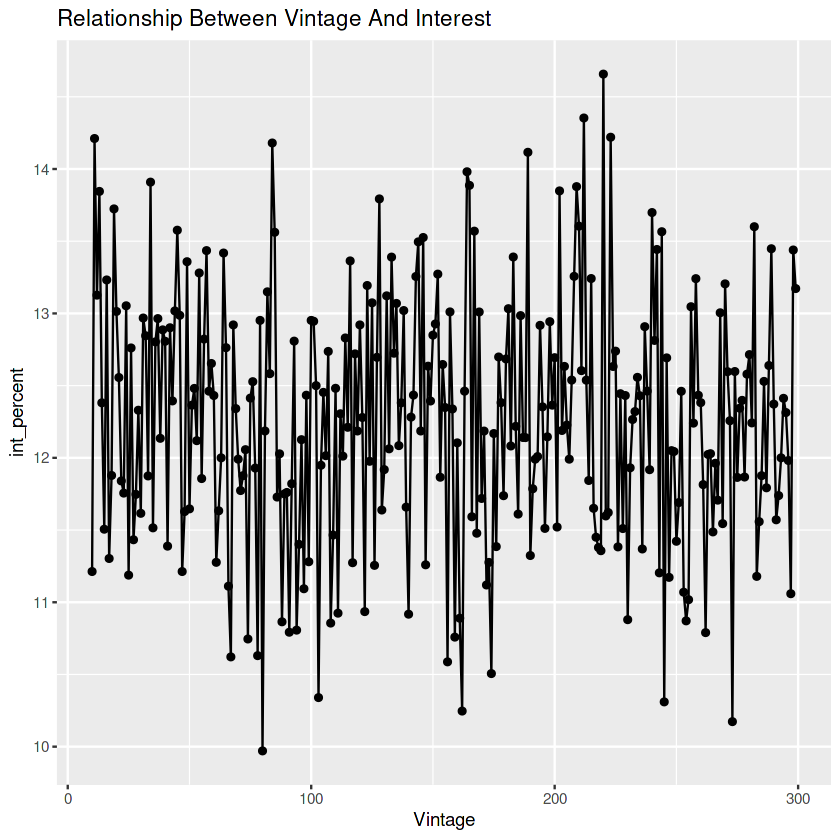

In [26]:
#### 10.2 Visualization of vintage factor

vin_table %>% 
  ggplot(mapping = aes(x=Vintage,y= int_percent))+
  geom_point()+geom_line()+
  ggtitle("Relationship Between Vintage And Interest")



**It doesn't look like there is a certain correlation between vintage and interest.

## Analysis Summary

Based on the analysis above, the company's target audience for cross sale should be focused on customers who
  1. have vehicle damage
  2. have a driver's license
  3. have at least 2 years of vehicle age
  4. are previously not insured
  5. are between 33-50 years old with over 20% chance of having interest (The range is expandable)
  6. are in regions where over 15% of the customers would have interest: 38, 28, 19, 4, 23, 51 (The range is expandable).
  7. are approachable with the top policy sales channels: 36, 155, 163, 3, 121 (The range is expandable).